In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

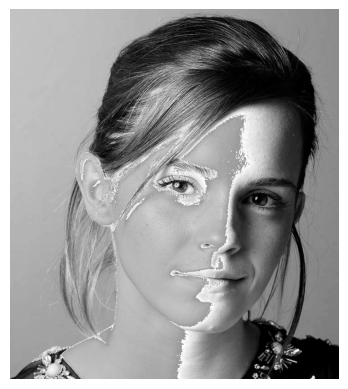

In [7]:
# Define the piecewise linear intensity transformation
def intensity_transform(value):
    if value <= 50:
        return int(2 * value)  
    elif 50 < value <= 150:
        return int(100+(value-50)*(155/100))
    else:
        return int(150+(value-150)*1)  

# Vectorize the function
v_intensity_transform = np.vectorize(intensity_transform)

image = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

transformed_image = v_intensity_transform(image)
transformed_image = transformed_image.astype('uint8')

plt.imshow(transformed_image,cmap='gray')
plt.axis('off')
plt.show()


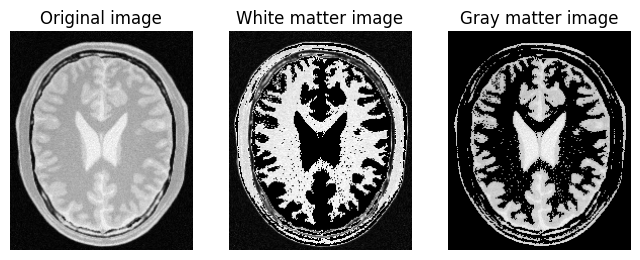

In [35]:
# Define the piecewise linear intensity transformation for white matter
def gray_matter_transform(value):
    if value >=181:
        return int(value)  
    else:
        return 0  

# Define the piecewise linear intensity transformation for gray matter
def white_matter_transform(value):
    if value <= 180:
        return int(value)  
    else:
        return 0  
    
# Vectorize the functions
v_white_matter_transform = np.vectorize(white_matter_transform)
v_gray_matter_transform = np.vectorize(gray_matter_transform)

image = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

#Apply transformations
white_matter_image = v_white_matter_transform(image)
gray_matter_image = v_gray_matter_transform(image)

white_matter_image = white_matter_image.astype(np.uint8)
gray_matter_image = gray_matter_image.astype(np.uint8)

fig , ax = plt.subplots(1,3,figsize=(8,8))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(white_matter_image,cmap='gray')
ax[1].set_title('White matter image')
ax[2].imshow(gray_matter_image,cmap='gray')
ax[2].set_title('Gray matter image')

for a in ax:
    a.axis('off')

plt.show()


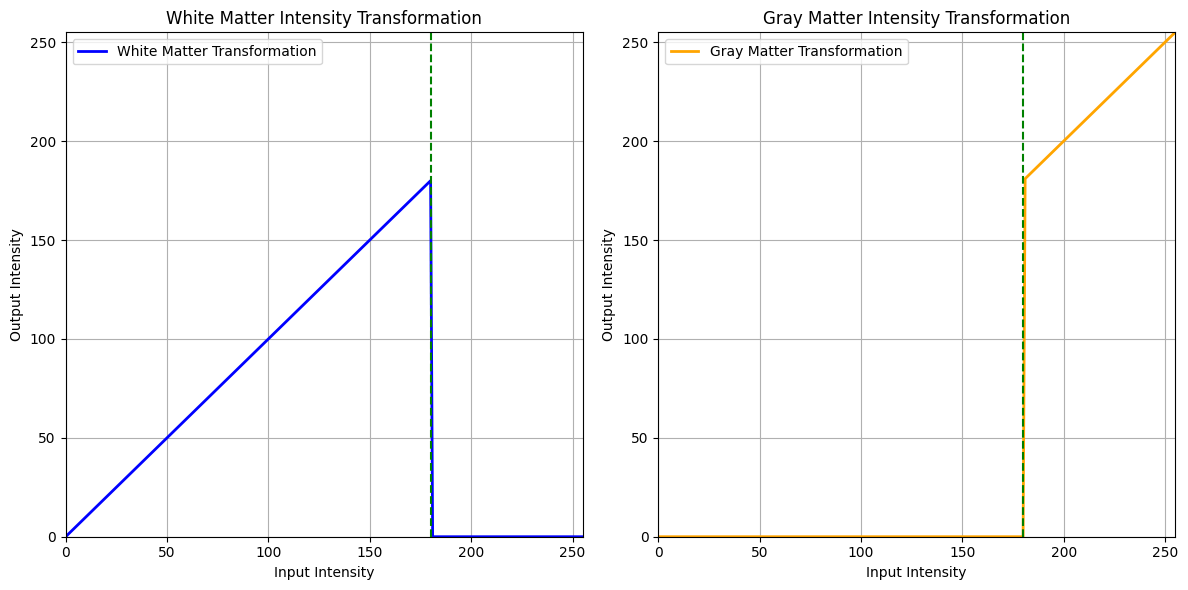

In [34]:
input_intensities = np.arange(256)

white_matter_output = v_white_matter_transform(input_intensities)
gray_matter_output = v_gray_matter_transform(input_intensities)

plt.figure(figsize=(12, 6))

# White Matter Transformation
plt.subplot(1, 2, 1)
plt.plot(input_intensities, white_matter_output, color='blue', label='White Matter Transformation', linewidth=2)
plt.title('White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid()
plt.axvline(180, color='green', linestyle='--')
plt.legend()

# Gray Matter Transformation
plt.subplot(1, 2, 2)
plt.plot(input_intensities, gray_matter_output, color='orange', label='Gray Matter Transformation', linewidth=2)
plt.title('Gray Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid()
plt.legend()
plt.axvline(180, color='green', linestyle='--')
plt.tight_layout()
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\g'
<>:29: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Sahan\AppData\Local\Temp\ipykernel_41220\1361387798.py:29: SyntaxWarning: invalid escape sequence '\g'
  ax[1].set_title(f'Transformed with $\gamma$ = {gamma}')


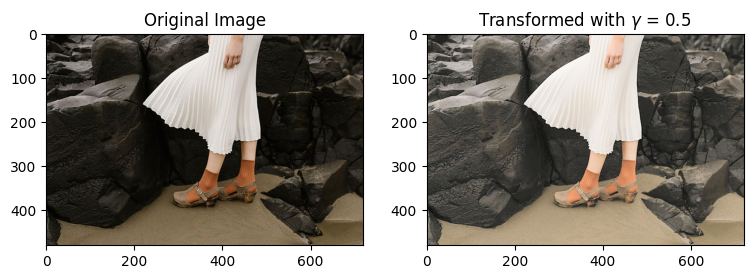

In [46]:
import cv2 as cv
import numpy as np

img = cv.imread('highlights_and_shadows.jpg')

# Convert RGB image to LAB color space
lab_img = cv.cvtColor(img, cv.COLOR_BGR2LAB)

# Split into L, A, and B channels
L, A, B = cv.split(lab_img)


gamma = 0.5

t1 = np.array([(i/255)**gamma*255 for i in range(256)],dtype=np.uint8)
L_gamma_corrected = cv.LUT(L,t1)

# Merge the corrected L channel with the original A and B channels
lab_gamma_corrected = cv.merge((L_gamma_corrected, A, B))

# Convert back to RGB color space
gamma_corrected_img = cv.cvtColor(lab_gamma_corrected, cv.COLOR_LAB2BGR)


fig,ax = plt.subplots(1,2,figsize=(9,12))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(gamma_corrected_img,cv.COLOR_BGR2RGB))
ax[1].set_title(f'Transformed with $\gamma$ = {gamma}')


plt.show()

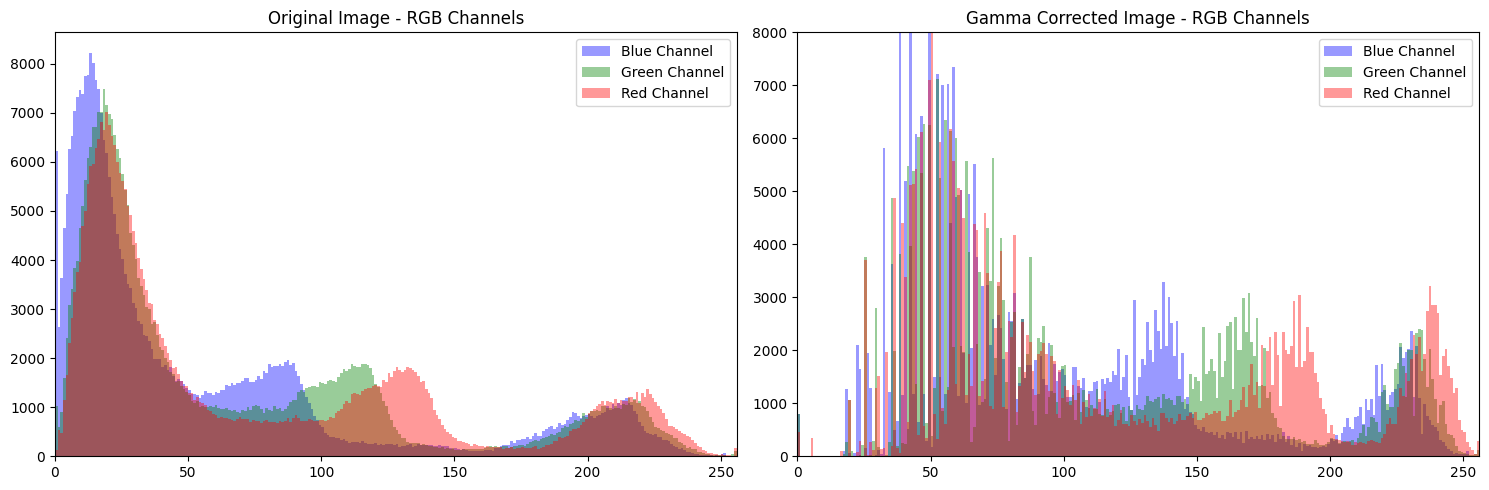

In [51]:
# Create subplots for original and gamma corrected image histograms
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Original image histograms (Red, Green, Blue in the same plot)
axs[0].set_title("Original Image - RGB Channels")
axs[0].hist(img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[0].hist(img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[0].hist(img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma corrected image histograms (Red, Green, Blue in the same plot)
axs[1].set_title("Gamma Corrected Image - RGB Channels")
axs[1].hist(gamma_corrected_img[:, :, 0].flatten(), bins=256, range=[0, 256], color='b', alpha=0.4, label='Blue Channel')
axs[1].hist(gamma_corrected_img[:, :, 1].flatten(), bins=256, range=[0, 256], color='g', alpha=0.4, label='Green Channel')
axs[1].hist(gamma_corrected_img[:, :, 2].flatten(), bins=256, range=[0, 256], color='r', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  
axs[1].legend()


plt.tight_layout()
plt.show()

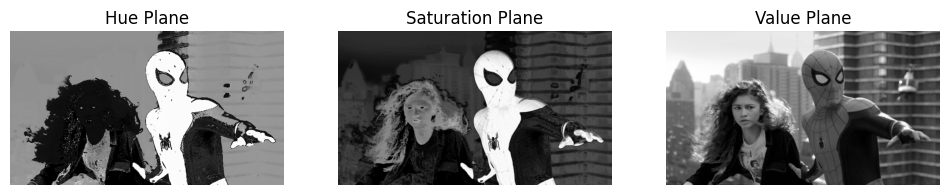

In [97]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format
spiderman_image = cv2.imread('spider.png')

# Convert the image to HSV
hsv_image = cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2HSV)

# Split the HSV image into three planes: H, S, V
hue, saturation, value = cv2.split(hsv_image)


fig , ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(hue,cmap='gray')
ax[0].set_title('Hue Plane')
ax[1].imshow(saturation,cmap='gray')
ax[1].set_title('Saturation Plane')
ax[2].imshow(value,cmap='gray')
ax[2].set_title('Value Plane')

for a in ax:
    a.axis('off')

plt.show()


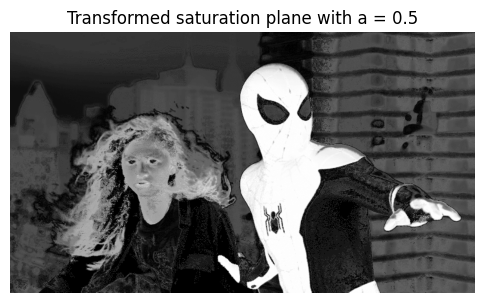

In [98]:
def transform(value,a):# a is between 0 and 1
    sigma = 70
    calc_value = value + a*128*np.exp(-(value-128)**2/(2*sigma**2))
    trans_value = min(calc_value,255)
    return  trans_value

transform_vector = np.vectorize(transform)


transformed_saturation_plane = transform_vector(saturation,0.5)

transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)

plt.figure(figsize=(6,8))
plt.imshow(transformed_saturation_plane,cmap='gray')
plt.title('Transformed saturation plane with a = 0.5')
plt.axis('off')
plt.show()


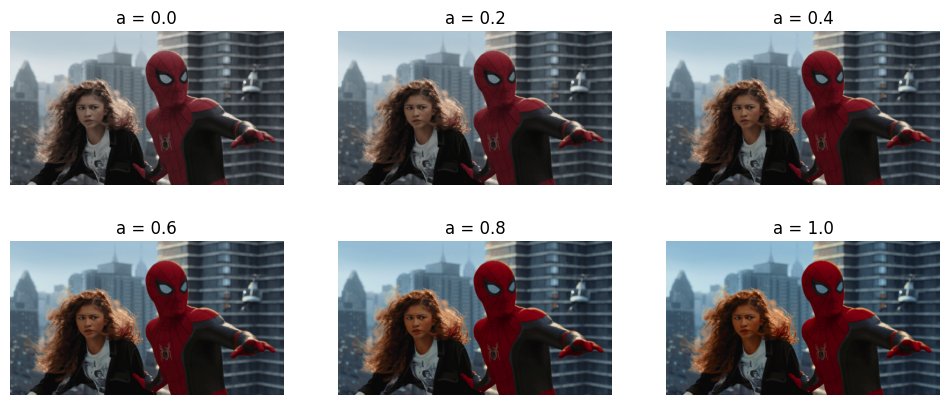

In [99]:
a_values = np.linspace(0,1,6)
fig , ax = plt.subplots(2,3,figsize=(12,5))
for i in range(6):
    a = round(a_values[i],1)
    
    transformed_saturation_plane = transform_vector(saturation,a)
    transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)
    hsv_image_recombined = cv2.merge([hue, transformed_saturation_plane, value])
    bgr_image = cv2.cvtColor(hsv_image_recombined, cv2.COLOR_HSV2RGB)
    row = i//3
    col = i%3
    ax[row][col].imshow(bgr_image)
    ax[row][col].set_title(f'a = {a}')
    ax[row][col].axis('off')

plt.show()
    
    

Desired value for a = 0.6

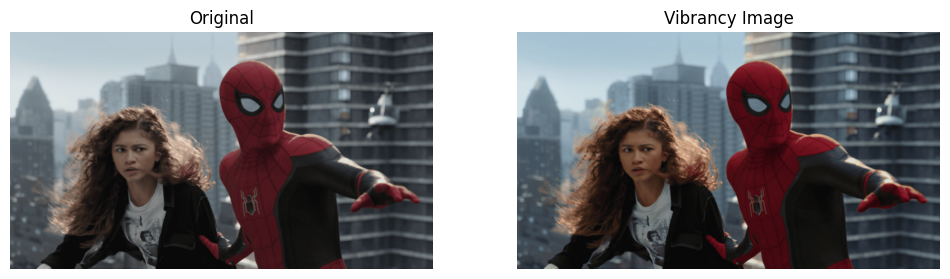

In [104]:
a = 0.4
transformed_saturation_plane = transform_vector(saturation,a)
transformed_saturation_plane = transformed_saturation_plane.astype(np.uint8)
hsv_image_recombined = cv2.merge([hue, transformed_saturation_plane, value])
bgr_image = cv2.cvtColor(hsv_image_recombined, cv2.COLOR_HSV2RGB)


fig , ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(cv2.cvtColor(spiderman_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(bgr_image)
ax[1].set_title('Vibrancy Image')

for a in ax:
    a.axis('off')

plt.show()

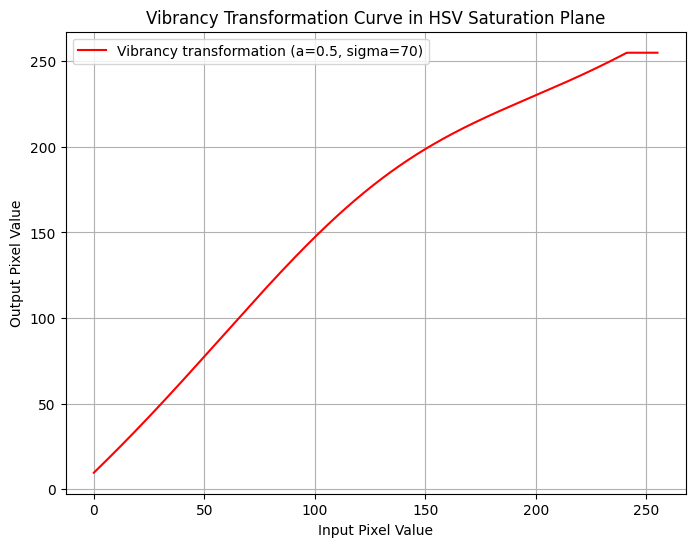

In [105]:
input_values = np.arange(0, 256)

# Output values
output_values = [transform(x, 0.4) for x in input_values]

# Plot the transformation
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label='Vibrancy transformation (a=0.5, sigma=70)', color='red')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.title('Vibrancy Transformation Curve in HSV Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()

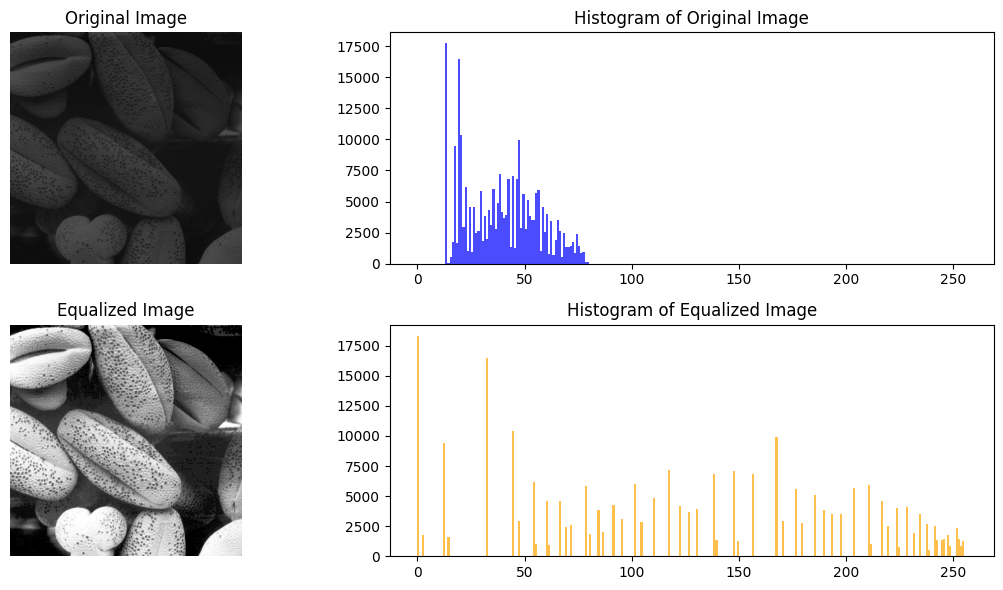

In [107]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for histogram equalization
def histogram_equalization(img):
    # Step 1: Compute the histogram of the image
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Masking to ignore pixels with zero intensity (if any)
    cdf_masked = np.ma.masked_equal(cdf, 0)

    # Step 3: Normalize the CDF to fit the range 0-255
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())

    # Fill the masked values in the CDF (for zero intensity pixels)
    cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')

    # Step 4: Map the original intensities to equalized intensities using the CDF
    img_equalized = cdf_final[img]

    return img_equalized

# Load the image
shells = cv2.imread('shells.tif', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = histogram_equalization(shells)

# Plot the original and equalized histograms
plt.figure(figsize=(12, 6))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(shells, cmap='gray',vmin=0,vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(shells.flatten(), bins=256, range=[0,256], color='blue', alpha=0.7)
plt.title('Histogram of Original Image')

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray',vmin=0,vmax=255)
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=[0,256], color='orange', alpha=0.7)
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()


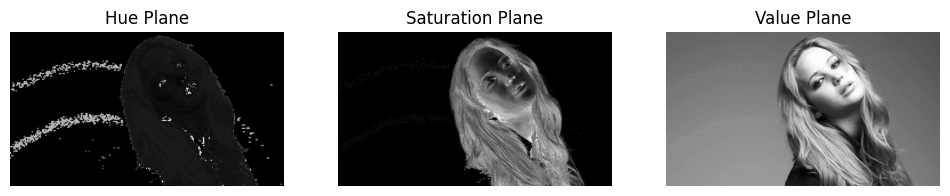

In [111]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format
jeniffer = cv2.imread('jeniffer.jpg')

# Convert the image to HSV
hsv_image = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2HSV)

# Split the HSV image into three planes: H, S, V
jennifer_hue, jennifer_saturation, jennifer_value = cv2.split(hsv_image)


fig , ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(jennifer_hue,cmap='gray')
ax[0].set_title('Hue Plane')
ax[1].imshow(jennifer_saturation,cmap='gray')
ax[1].set_title('Saturation Plane')
ax[2].imshow(jennifer_value,cmap='gray')
ax[2].set_title('Value Plane')

for a in ax:
    a.axis('off')

plt.show()

4. b) Saturation plane can be used to extract the foreground 

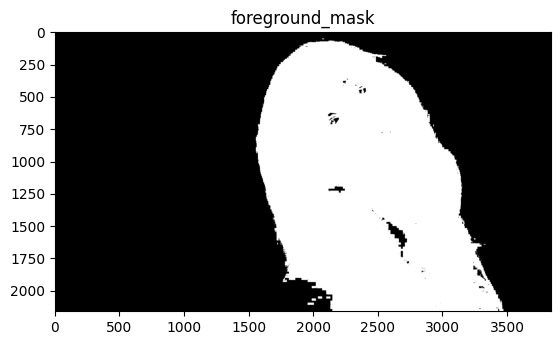

In [116]:
# Foreground mask for the image
foreground_mask = jennifer_saturation >15
plt.title("foreground_mask")
plt.imshow(foreground_mask, cmap='gray')
plt.show()

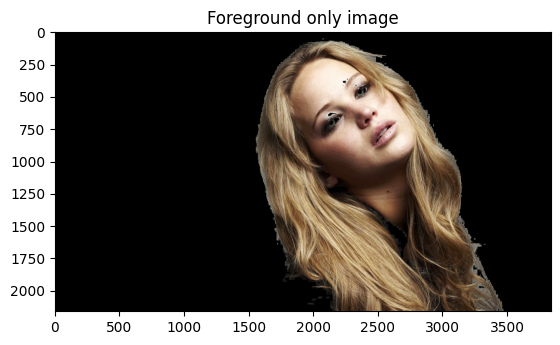

In [118]:
# Get the foreground only from the image
foreground_only = cv2.bitwise_and(jeniffer, jeniffer, mask=foreground_mask.astype(np.uint8));

# Display the foreground only image
plt.title("Foreground only image")
plt.imshow(cv2.cvtColor(foreground_only, cv2.COLOR_BGR2RGB))
plt.show()

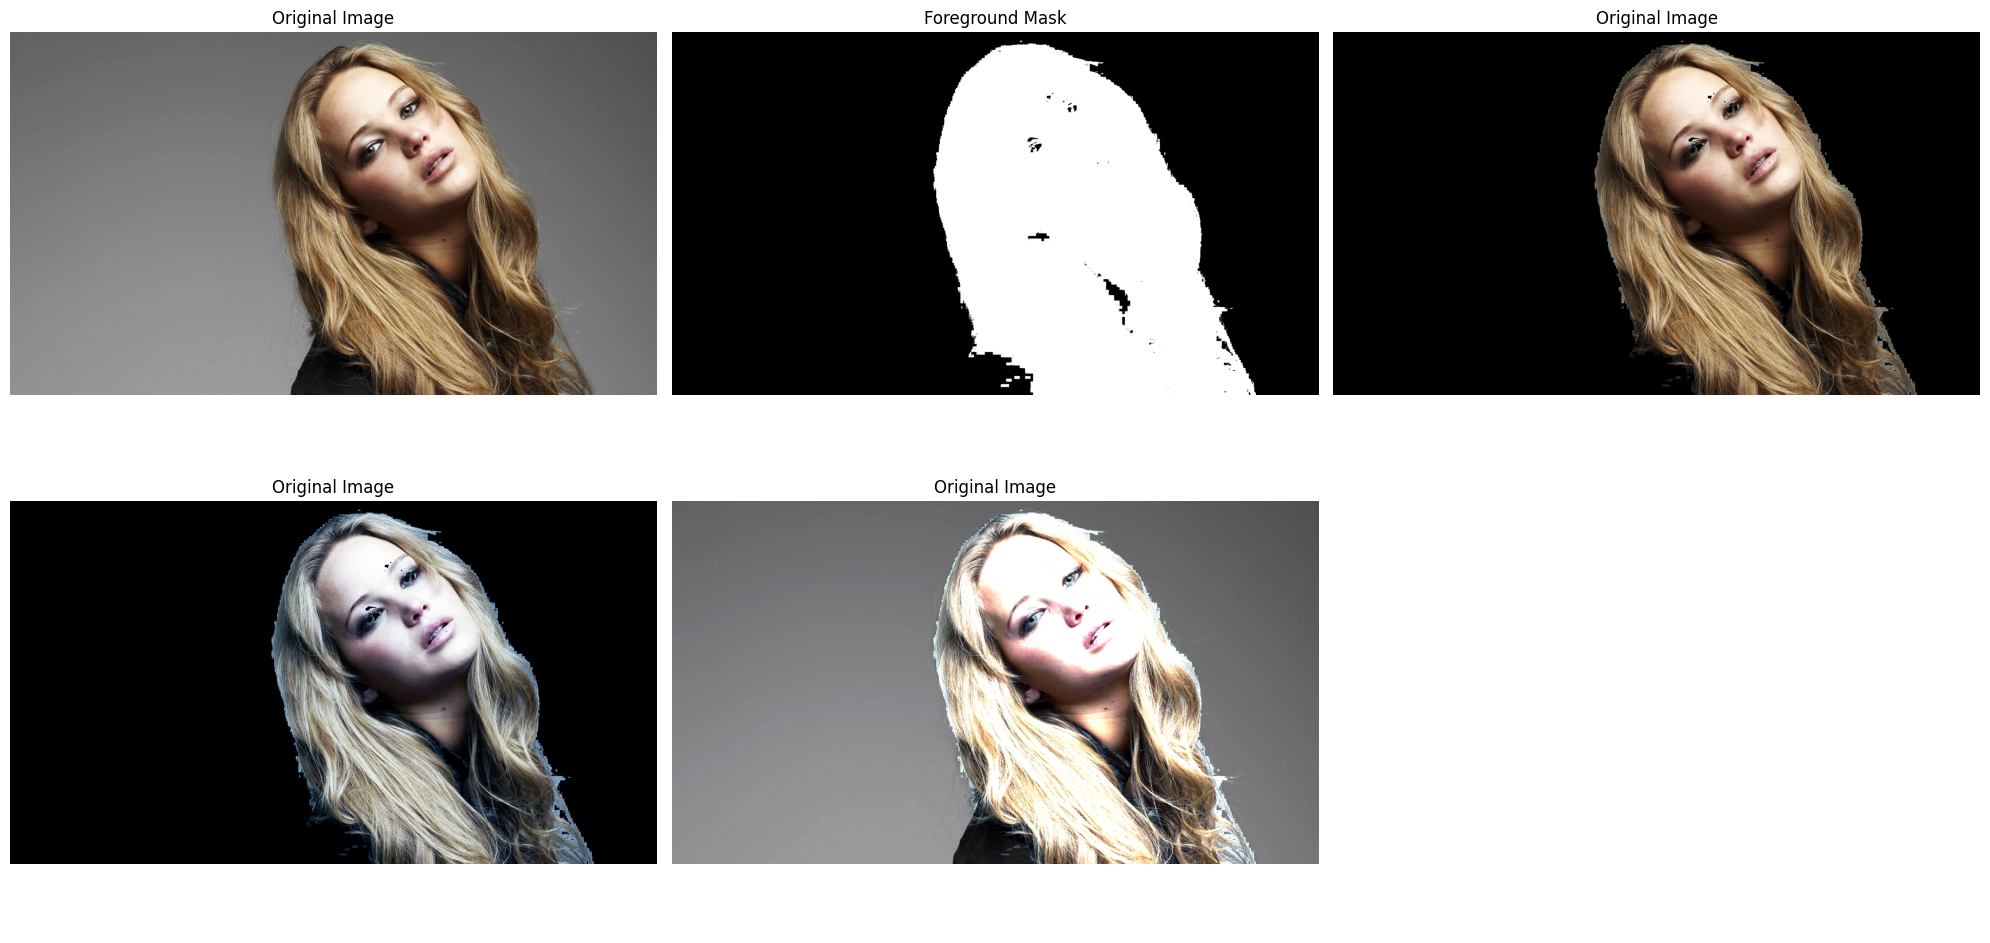

In [126]:
# Compute histograms for each channel
hist_b = cv2.calcHist([foreground_only], [0], foreground_mask.astype(np.uint8), [256], [0, 256])
hist_g = cv2.calcHist([foreground_only], [1], foreground_mask.astype(np.uint8), [256], [0, 256])
hist_r = cv2.calcHist([foreground_only], [2], foreground_mask.astype(np.uint8), [256], [0, 256])

# (d) Obtain cumulative sum of histograms
cum_hist_b = np.cumsum(hist_b)
cum_hist_g = np.cumsum(hist_g)
cum_hist_r = np.cumsum(hist_r)

# (e) Histogram equalization for foreground
def equalize_histogram(cum_hist, pixel_count):
    return ((cum_hist / pixel_count) * 255).astype(np.uint8)

pixel_count = foreground_mask.astype(np.uint8).sum()

# Look up tables for each color channel
lut_b = equalize_histogram(cum_hist_b, pixel_count)
lut_g = equalize_histogram(cum_hist_g, pixel_count)
lut_r = equalize_histogram(cum_hist_r, pixel_count)

# Apply equalization to foreground
equalized_foreground = np.zeros_like(foreground_only)
equalized_foreground[:,:,0] = cv2.LUT(foreground_only[:,:,0], lut_b)
equalized_foreground[:,:,1] = cv2.LUT(foreground_only[:,:,1], lut_g)
equalized_foreground[:,:,2] = cv2.LUT(foreground_only[:,:,2], lut_r)

# (f) Combine equalized foreground with original background
background = cv2.bitwise_and(jeniffer, jeniffer, mask=cv2.bitwise_not(foreground_mask.astype(np.uint8)))
result = cv2.add(equalized_foreground, background)

fig , ax = plt.subplots(2,3,figsize=(20,10))
ax[0][0].imshow(cv2.cvtColor(jeniffer, cv2.COLOR_BGR2RGB))
ax[0][0].set_title('Original Image')
ax[0][1].imshow(foreground_mask, cmap='gray')
ax[0][1].set_title('Foreground Mask')
ax[0][2].imshow(cv2.cvtColor(foreground_only, cv2.COLOR_BGR2RGB))
ax[0][2].set_title('Original Image')
ax[1][0].imshow(cv2.cvtColor(equalized_foreground, cv2.COLOR_BGR2RGB))
ax[1][0].set_title('Original Image')
ax[1][1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax[1][1].set_title('Original Image')

for a in ax:
    a[0].axis('off')
    a[1].axis('off')
    a[2].axis('off')

plt.tight_layout()
plt.show()

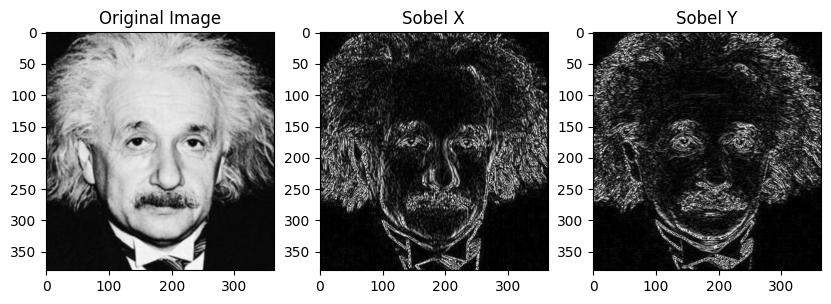

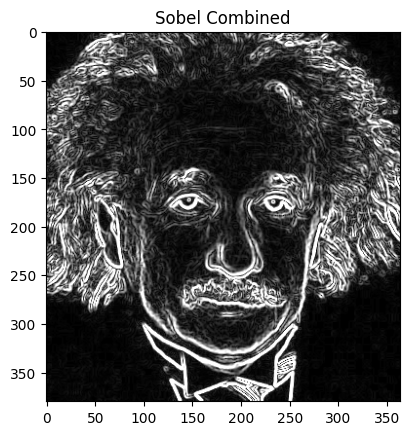

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (grayscale)
image = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel for the X and Y directions
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

filtered_x = cv2.filter2D(image, cv.CV_32F, sobel_x)
filtered_y = cv2.filter2D(image, cv.CV_32F, sobel_y)

# Combine the two filters
sobel_combined = np.sqrt(filtered_x**2 + filtered_y**2)
sobel_combined = np.clip(sobel_combined, 0, 255)  

# Convert the result back to uint8 format
filtered_x = np.uint8(np.abs(filtered_x))
filtered_y = np.uint8(np.abs(filtered_y))
sobel_combined = np.uint8(sobel_combined)

# Display the result
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(filtered_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(filtered_y, cmap='gray')

plt.figure()
plt.title("Sobel Combined")
plt.imshow(sobel_combined, cmap='gray')

plt.show()


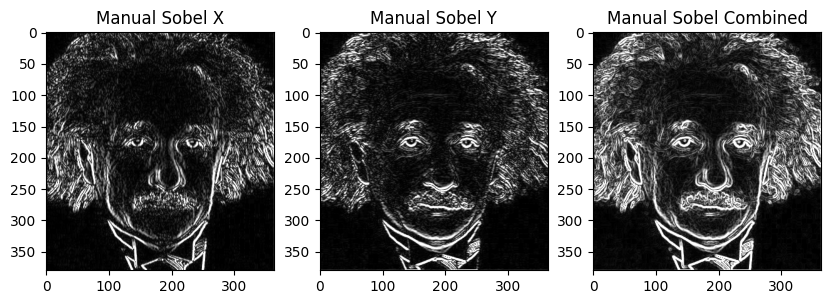

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

# Sobel kernels for x and y directions
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

def sobel_filter(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    
    # Pad the image with zero padding (to deal with boundary effects)
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Output image with the same size as input
    output_image = np.zeros_like(image, dtype=np.float32)
    
    # Apply convolution (manual filtering)
    for i in range(height):
        for j in range(width):
            # Extract region of interest (ROI) around the pixel
            region = padded_image[i:i+k_height, j:j+k_width]
            # Convolution (dot product of kernel and image patch)
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Apply Sobel filters manually in both directions
sobel_x_manual = sobel_filter(image, sobel_x)
sobel_y_manual = sobel_filter(image, sobel_y)

# Combine the gradients using the magnitude
sobel_combined_manual = np.sqrt(sobel_x_manual**2 + sobel_y_manual**2)

# Convert to absolute values and enhance contrast using convertScaleAbs
sobel_x_manual = cv2.convertScaleAbs(sobel_x_manual)
sobel_y_manual = cv2.convertScaleAbs(sobel_y_manual)
sobel_combined_manual = cv2.convertScaleAbs(sobel_combined_manual)

# Display the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Manual Sobel X")
plt.imshow(sobel_x_manual, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Manual Sobel Y")
plt.imshow(sobel_y_manual, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Manual Sobel Combined")
plt.imshow(sobel_combined_manual, cmap='gray')

plt.show()


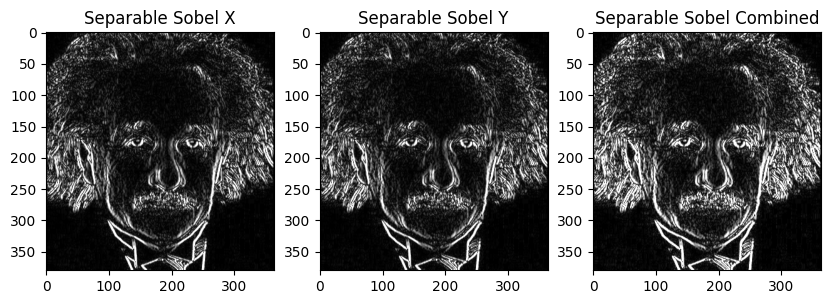

In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

# Define the 1D Sobel kernels
kernel_x_1d = np.array([1, 0, -1], dtype=np.float32)  # Horizontal
kernel_y_1d = np.array([1, 2, 1], dtype=np.float32)   # Vertical

# Apply the Sobel filter by convolving twice (separable convolution)
# First, apply horizontal 1D filter (along x-axis)
sobel_x_1d = cv2.filter2D(image, cv2.CV_32F, kernel_x_1d.reshape(1, 3))

# Then, apply vertical 1D filter (along y-axis) to the result
sobel_separable_x = cv2.filter2D(sobel_x_1d, cv2.CV_32F, kernel_y_1d.reshape(3, 1))

# For Sobel Y, first apply vertical 1D filter (along y-axis)
sobel_y_1d = cv2.filter2D(image, cv2.CV_32F, kernel_y_1d.reshape(3, 1))

# Then, apply horizontal 1D filter (along x-axis) to the result
sobel_separable_y = cv2.filter2D(sobel_y_1d, cv2.CV_32F, kernel_x_1d.reshape(1, 3))

# Combine the gradients
sobel_separable_combined = np.sqrt(sobel_separable_x**2 + sobel_separable_y**2)

# Convert the results to absolute values and scale for visualization
sobel_separable_x = cv2.convertScaleAbs(sobel_separable_x)
sobel_separable_y = cv2.convertScaleAbs(sobel_separable_y)
sobel_separable_combined = cv2.convertScaleAbs(sobel_separable_combined)

# Display the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Separable Sobel X")
plt.imshow(sobel_separable_x, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Separable Sobel Y")
plt.imshow(sobel_separable_y, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Separable Sobel Combined")
plt.imshow(sobel_separable_combined, cmap='gray')

plt.show()


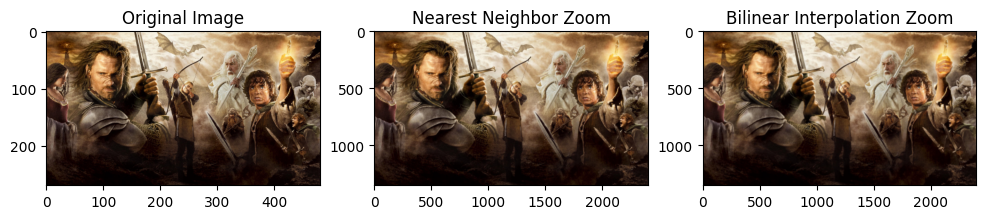

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nearest_neighbor_zoom_color(image, scale_factor):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Create an empty output image with the same number of channels
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            # Find the nearest pixel in the original image
            original_x = min(int(i / scale_factor), height - 1)
            original_y = min(int(j / scale_factor), width - 1)
            zoomed_image[i, j] = image[original_x, original_y]
    
    return zoomed_image

def bilinear_interpolation_zoom_color(image, scale_factor):
    height, width, channels = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an empty output image with the same number of channels
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.float32)

    for i in range(new_height):
        for j in range(new_width):
            for c in range(channels):
                # Map the zoomed pixel back to the original image's coordinate system
                x = i / scale_factor
                y = j / scale_factor

                # Find the four surrounding pixels
                x1 = min(int(np.floor(x)), height - 1)
                x2 = min(x1 + 1, height - 1)
                y1 = min(int(np.floor(y)), width - 1)
                y2 = min(y1 + 1, width - 1)

                # Calculate the differences between the target pixel and the surrounding pixels
                dx = x - x1
                dy = y - y1

                # Perform bilinear interpolation for each channel
                top = (1 - dx) * image[x1, y1, c] + dx * image[x2, y1, c]
                bottom = (1 - dx) * image[x1, y2, c] + dx * image[x2, y2, c]
                zoomed_image[i, j, c] = (1 - dy) * top + dy * bottom

    return zoomed_image.astype(np.uint8)

# Load the image (color image)
image = cv2.imread('a1q5images/im01small.png')

# Zoom factor
scale_factor = float(5)

# Nearest-neighbor interpolation (color)
zoomed_nn_image = nearest_neighbor_zoom_color(image, scale_factor)

# Bilinear interpolation (color)
zoomed_bilinear_image = bilinear_interpolation_zoom_color(image, scale_factor)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly

plt.subplot(1, 3, 2)
plt.title("Nearest Neighbor Zoom")
plt.imshow(cv2.cvtColor(zoomed_nn_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly

plt.subplot(1, 3, 3)
plt.title("Bilinear Interpolation Zoom")
plt.imshow(cv2.cvtColor(zoomed_bilinear_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying correctly

plt.show()


Normalized SSD (Nearest Neighbor): 136.2690534979424
Normalized SSD (Bilinear): 200.24504115226338


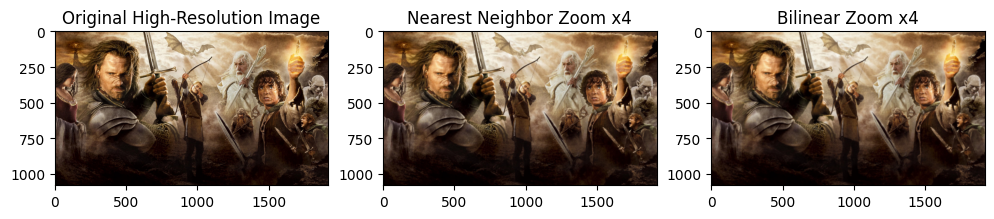

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_normalized_ssd(image1, image2):
    """
    Computes the normalized sum of squared differences (SSD) between two images.
    
    Parameters:
    - image1: The first image (scaled-up version).
    - image2: The second image (original high-resolution image).
    
    Returns:
    - normalized_ssd: The normalized SSD value.
    """
    # Ensure both images have the same size and dtype
    assert image1.shape == image2.shape, "Images must have the same dimensions for SSD calculation."
    
    # Compute the squared differences
    squared_diff = (image1.astype(np.float32) - image2.astype(np.float32)) ** 2
    
    # Sum all the squared differences
    ssd = np.sum(squared_diff)
    
    # Normalize by the number of pixels (to make SSD independent of image size)
    normalized_ssd = ssd / image1.size
    
    return normalized_ssd

# Load the small image and the original high-resolution image
small_image = cv2.imread('a1q5images/im01small.png')  # The small image
original_image = cv2.imread('a1q5images/im01.png')  # The original high-resolution image

# Check that the original image dimensions are 4 times larger than the small image
assert original_image.shape[0] == 4 * small_image.shape[0] and original_image.shape[1] == 4 * small_image.shape[1], \
    "The original image must be 4x larger than the small image in both dimensions."

# Zoom the small image by a factor of 4 using nearest-neighbor interpolation
zoomed_nn_image = nearest_neighbor_zoom_color(small_image, scale_factor=4)

# Zoom the small image by a factor of 4 using bilinear interpolation
zoomed_bilinear_image = bilinear_interpolation_zoom_color(small_image, scale_factor=4)

# Compute the normalized SSD between the zoomed image and the original image (nearest-neighbor)
ssd_nn = compute_normalized_ssd(zoomed_nn_image, original_image)

# Compute the normalized SSD between the zoomed image and the original image (bilinear)
ssd_bilinear = compute_normalized_ssd(zoomed_bilinear_image, original_image)

# Print the SSD results
print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

# Display the images for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original High-Resolution Image")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Nearest Neighbor Zoom x4")
plt.imshow(cv2.cvtColor(zoomed_nn_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Bilinear Zoom x4")
plt.imshow(cv2.cvtColor(zoomed_bilinear_image, cv2.COLOR_BGR2RGB))

plt.show()


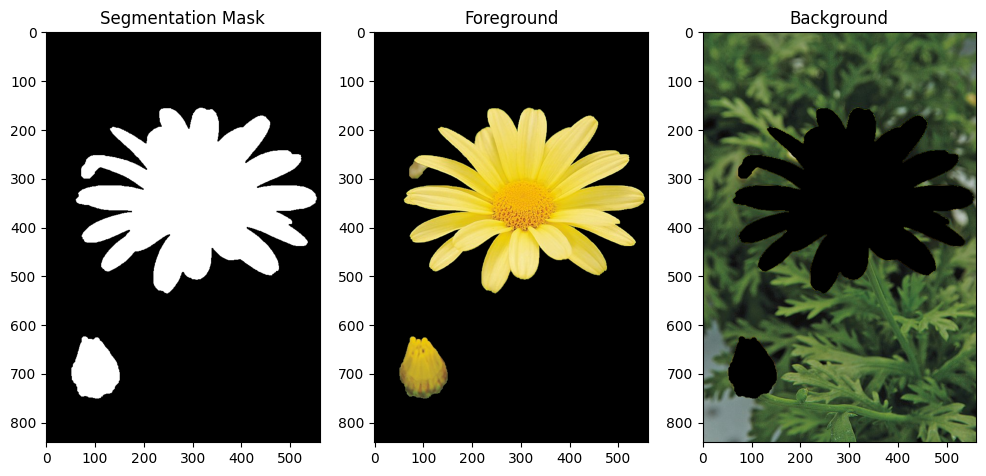

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('daisy.jpg')

# Create an initial mask
mask = np.zeros(image.shape[:2], np.uint8)

# Define background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle containing the object (bounding box around the flower)
rect = (40, 30, 540, 830)  # Refine the bounding box values

# Run GrabCut algorithm with more iterations
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)

# Refine the mask (0 and 2 are background, 1 and 3 are foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply morphological operations to improve segmentation
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel)

# Extract the foreground
foreground = image * mask2[:, :, np.newaxis]

# Extract the background
background = image * (1 - mask2[:, :, np.newaxis])

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Background')

plt.show()


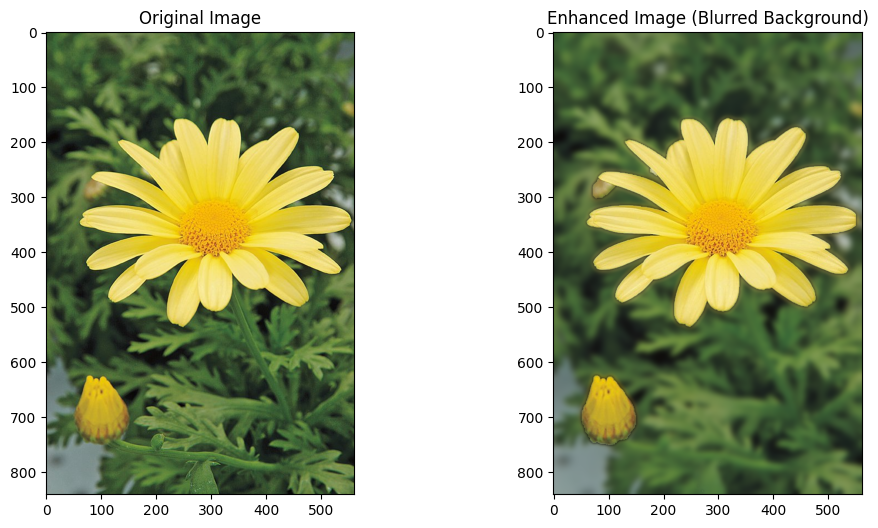

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('daisy.jpg')

# Create an initial mask for foreground
mask = np.zeros(original_image.shape[:2], np.uint8)

# Background and foreground models for grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle containing the flower
rect = (40, 30, 510, 830)  # Refined bounding box

# Apply grabCut to segment the foreground
cv2.grabCut(original_image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Refine the mask: Set 0 and 2 to background, 1 and 3 to foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the foreground (flower)
foreground = original_image * mask2[:, :, np.newaxis]

# Create an inverted mask for the background
inv_mask = cv2.bitwise_not(mask2 * 255)

# Apply Gaussian Blur to the background area
blurred_background = cv2.GaussianBlur(original_image, (31, 31), 0)

# Feather the edges by dilating and then applying a blur to the mask
feather_mask = cv2.GaussianBlur(mask2.astype(np.float32), (15, 15), 0)

# Combine the blurred background and the sharp foreground using the feathered mask
feathered_foreground = (foreground * feather_mask[:, :, np.newaxis]).astype(np.uint8)
feathered_background = (blurred_background * (1 - feather_mask[:, :, np.newaxis])).astype(np.uint8)

# Merge the images
enhanced_image = cv2.add(feathered_foreground, feathered_background)

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image (Blurred Background)')

plt.show()
